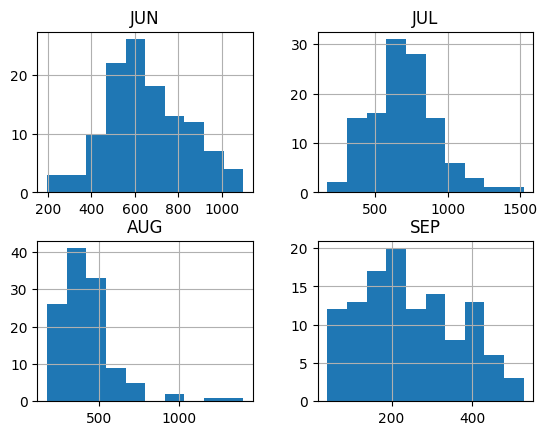

Predicted chances of flood
[1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0]
Actual chances of flood
[1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0]

accuracy score: 91.666667


In [1]:
#Import some basic libraries
import numpy as np
import pandas as pd

#Read the data present in dataset
data = pd.read_csv('/content/hyderabad2.csv')
#Using data.head() we can see the top 5 rows of the dataset
data.head()

#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

#We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

#Let's see how are data looks like now
data.head()

#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,1:14]
x.head()

#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

#Let's see how the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Let's see how our train set looks like
x_train.head()

y_train.head()

x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

lr_accuracy.mean()

y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)

print('Actual chances of flood')
print(y_test.values)

from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
#print("recall score: %f"%(recall_score(y_test,y_predict)*100))
#print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))